
http://eprints.hud.ac.uk/id/eprint/24330/

https://www.phishtank.com/developer_info.php

https://archive.ics.uci.edu/ml/machine-learning-databases/00327/Training%20Dataset.arff

Spambase
https://archive.ics.uci.edu/ml/datasets/Spambase
Need phishing instead!


https://blog.knowbe4.com/q2-2018-top-clicked-phishing-email-subjects
The Top 10 Most-Clicked General Email Subject Lines Globally for Q2 2018 include:

Password Check Required Immediately 15%
Security Alert 12%
Change of Password Required Immediately 11%
A Delivery Attempt was made 10%
Urgent press release to all employees 10%
De-activation of [[email]] in Process 10%
Revised Vacation & Sick Time Policy 9%
UPS Label Delivery, 1ZBE312TNY00015011 9%
Staff Review 2017 7%
Company Policies-Updates to our Fraternization Policy 7%
*Capitalization and spelling are as they were in the phishing test subject line
**Email subject lines are a combination of both simulated phishing templates created by KnowBe4 for clients, and custom tests designed by KnowBe4 customers

Most common ‘in-the-wild’ emails in Q2 2018 included:

Microsoft: Re: Important Email Backup Failed
Microsoft/Office 365: Re: Clutter Highlight
Wells Fargo: Your Wells Fargo contact information has been updated
Chase: Fraudulent Activity On Your Checking Account – Act Now
Office 365: Change Your Password Immediately
Amazon: We tried to deliver your package today
Amazon: Refund - Valid Billing Information Needed
IT: Ransomware Scan • Docusign: Your Docusign account is suspended
You have a secure message
*Capitalization and spelling are as they were in the phishing test subject line **In-the-wild email subject lines represent actual emails users received and reported to their IT departments as suspicious. They are not simulated phishing test emails.

In [1]:
# MIT License
# 
# Copyright (c) 2018 Michael DeFelice
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
# 
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
# 
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

import numpy as np, pandas as pd
import quandl

In [2]:
from matplotlib.ticker import FuncFormatter, MultipleLocator
import matplotlib.pyplot as plt
plt.style.use ('ggplot')

In [3]:
# For better feeds, create an account on quandl.com and include your API key in the call
df = quandl.get ('WIKI/AAPL', start_date = '2017-01-01', rows = 250)

In [4]:
# Isolate the close price column
s = df['Close'].rename ('AAPL_Close_Price')
end_price = s.iloc[-1]

In [5]:
# This may be helpful ... mostly a placeholder to store the formula to calculate CAGR with less than a year's data
cagr = ((end_price / float (s.iloc[0])) ** (365/float (s.shape[0]))) - 1

In [6]:
# Daily changes as percentages
changes = s.pct_change ()
mu = changes.mean ()
vD = changes.std ()

In [11]:
# Create an array of 10000 random walks - each with 90 steps
k = np.cumprod (1 + np.random.normal (mu, vD, (10000,90)), 1) * end_price

In [12]:
# The last step as an array. In this case, useful to answer the question: "In 90 days, where could this go?"
l = k[:, -1]
l

array([186.6039332 , 194.62964864, 152.81198784, ..., 169.04261401,
       185.17553088, 180.89396285])

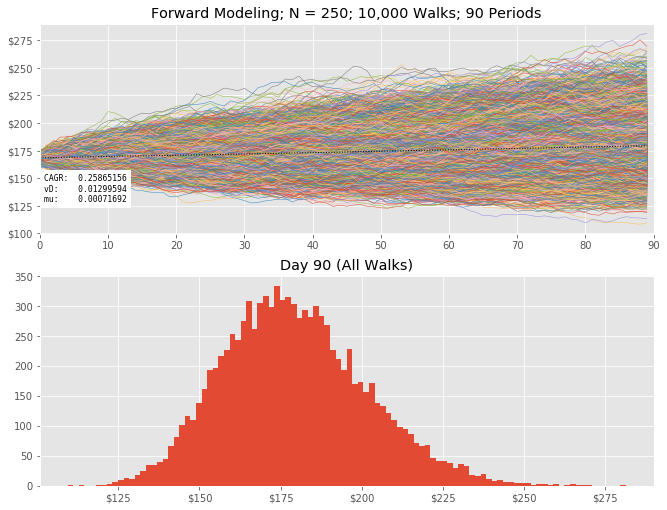

In [13]:
# Plot
fig, ax = plt.subplots (2, 1, figsize = (11, 8.5))
ax[0].plot (k.T, linewidth = 0.5)
ax[0].set_title ("Forward Modeling; N = {:,}; {:,} Walks; {:,} Periods".format (len (s), *k.shape))
ax[0].get_yaxis ().set_major_formatter (FuncFormatter (lambda a, b: '${:,.0f}'.format (a * 1e-0)))
ax[0].set_xlim (0, k.T.shape[0])

# Add a dotted line to trace the mean across the walks
ax[0].plot ([_.mean () for _ in k.T], color = 'k', linewidth = 1, linestyle = ':', label = 'Expected Value')

# Annotate
ax[0].annotate ('CAGR:  {}\nvD:    {}\nmu:    {}'.format (round (cagr, 8), round (vD, 8), round (mu, 8)), xy = (0, 45), xycoords = 'axes pixels', xytext = (4, 0), textcoords = 'offset points', ha = 'left', va = 'center', fontsize = 8, family = 'monospace', fontweight = 'normal', bbox = {'facecolor': 'white', 'edgecolor': 'none', 'pad': 4,})

# What does the last stew look like across all walks?
ax[1].hist (l, bins = 100)
ax[1].set_title ("Day {} (All Walks)".format (k.shape[1]))
ax[1].get_xaxis ().set_major_formatter (FuncFormatter (lambda a, b: '${:,.0f}'.format (a * 1e-0)))

plt.show ()